####  훈련용과 테스트용 데이터 준비

In [63]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.initializers import HeNormal
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler
import os
import tensorflow
import tensorflow as tf

In [77]:
label_file='all1.csv'
label=pd.read_csv(label_file)
# label = label.drop('Unnamed: 0', axis=1)
print(label['style'].value_counts())

powersuit         2334
sportivecasual    2327
feminine          2091
minimal           1799
normcore          1393
classic           1267
hippie            1185
cityglam           984
kitsch             942
oriental           882
bodyconscious      802
punk               800
ecology            700
popart             617
space              614
disco              593
lounge             530
athleisure         521
genderless         515
hiphop             454
lingerie           439
grunge             375
military           332
Name: style, dtype: int64


In [65]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
# 스타일 라벨 인코딩
encoder = LabelEncoder()
label['style_encoded'] = encoder.fit_transform(label['style'])
label['style_encoded'] = label['style_encoded'].astype(int)
y_labels = to_categorical(label['style_encoded'], num_classes=23)

In [78]:
label

,era,style,age,job,income
0,1950,classic,3,4,2
1,1950,classic,2,3,2
2,1950,classic,3,4,2
3,1950,classic,3,1,5
4,1950,classic,3,1,6
...,...,...,...,...,...
22491,2019,normcore,1,4,2
22492,2019,normcore,1,4,2
22493,2019,normcore,1,4,2
22494,2019,normcore,1,4,2


In [83]:
print(y_labels[22491])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [67]:
label = pd.get_dummies(label['style']).astype('uint8')
label=label.to_numpy()
label

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [68]:
type(label)

numpy.ndarray

In [69]:
combined_data = np.load('all_32.npy')

In [70]:
combined_data.shape

(22496, 100, 75, 3)

In [26]:
train_x, test_x, train_y, test_y = train_test_split(combined_data, 
                                                    label, 
                                                    stratify=label, 
                                                    random_state=7)

In [50]:
train_x= np.load('./train_x.npy')
train_y= np.load('./train_y.npy')
val_x=np.load('./val_x.npy')
val_y=np.load('./val_y.npy')

In [30]:
train_x_2, val_x, train_y_2, val_y = train_test_split(train_x, train_y, test_size=0.25, random_state=7)

In [51]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator()

augmented_train_data = train_datagen.flow(train_x, train_y)

validation_data = train_datagen.flow(val_x, val_y)

In [28]:
np.save('train_x.npy',train_x)
np.save('test_x.npy',test_x)
np.save('train_y.npy',train_y)
np.save('test_y.npy',test_y)

In [31]:
np.save('train_x_2.npy',train_x_2)
np.save('val_x.npy',val_x)
np.save('train_y_2.npy',train_y_2)
np.save('val_y.npy',val_y)

In [52]:
test_x=np.load('test_x.npy')
test_y=np.load('test_y.npy')

In [14]:
# train_x.shape,test_x.shape,train_y.shape,test_y.shape

In [15]:
# import tensorflow as tf
# train_x_resized2 = tf.image.resize(train_x, (100, 75))
# np.save('train_x_resized2.npy',train_x_resized2)

In [16]:
# test_x_resized2 = tf.image.resize(test_x, (100, 75))
# np.save('test_x_resized2.npy',test_x_resized2)

In [17]:
# train_x_2, val_x, train_y_2, val_y = train_test_split(train_x, train_y, test_size=0.25, random_state=7)

In [18]:
# from keras.preprocessing.image import ImageDataGenerator
# train_datagen = ImageDataGenerator()

# augmented_train_data = train_datagen.flow(train_x, train_y)


#### 모델 설계 :

- 입력층의 입력 데이터 형태 :  
- 출력층의 노드/유닛/커널/뉴런 갯수 지정 : 

In [53]:
he=HeNormal(seed=100)
model=Sequential()
model.add(Conv2D(16,3,input_shape=(100,75,3),padding= "same"))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D())
model.add(Conv2D(16,3,padding= "same"))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D())
model.add(Flatten())


model.add(Dense(16,kernel_initializer=he))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(16,kernel_initializer=he))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(23,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 100, 75, 16)       448       
                                                                 
 activation_8 (Activation)   (None, 100, 75, 16)       0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 50, 37, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 37, 16)        2320      
                                                                 
 activation_9 (Activation)   (None, 50, 37, 16)        0         
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 25, 18, 16)        0         
 g2D)                                                 

In [54]:
model_path='./models/'
# 폴더 생성 함수
def file_check(file_path): 
    if os.path.exists(file_path) : 
        print(f"[{file_path}] 파일이 존재합니다.")
    else :
        print(f"[{file_path}] 파일이 존재하지 않습니다. \n저장 폴더를 생성합니다.")
        os.makedirs(file_path)
        print('저장 폴더 생성 완료')

file_check(model_path)

[./models/] 파일이 존재합니다.


In [55]:
# 객체 생성
model_file=model_path+'model_.hdf5' # {epoch:03} => epoch의 횟수를 파일명으로 저장

# 기본값 : val_loss (기준) => 낮아지면 저장. 이름을 epoch로 지정해서 파일이 계속 생성됨. 
# 이름을 똑같이 하면 마지막에 1개의 파일만 남음
    
mc_CB=ModelCheckpoint(model_file,
                    save_best_only=True) # 가장 좋은 모델만 저장  

# 조기종료 기준 : val_loss가 3 epochs 동안 감소되지 않으면 종료
es_CB=EarlyStopping(patience=3)



In [56]:
model.compile(optimizer='nadam',loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
result=model.fit(train_x, train_y, 
          epochs=500,
          batch_size=32,
          validation_split=0.2,
          callbacks=[mc_CB, es_CB])

Epoch 1/500
422/422 [==============================] - 23s 51ms/step - loss: 2.9717 - accuracy: 0.1231 - val_loss: 2.9116 - val_accuracy: 0.1437
Epoch 2/500
  2/422 [..............................] - ETA: 24s - loss: 2.8925 - accuracy: 0.1094

c:\Users\KDP-037-\anaconda3\envs\my_python\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


422/422 [==============================] - 24s 56ms/step - loss: 2.8670 - accuracy: 0.1479 - val_loss: 2.8374 - val_accuracy: 0.1570
Epoch 3/500
422/422 [==============================] - 23s 54ms/step - loss: 2.7934 - accuracy: 0.1600 - val_loss: 2.8126 - val_accuracy: 0.1656
Epoch 4/500
422/422 [==============================] - 23s 55ms/step - loss: 2.7155 - accuracy: 0.1733 - val_loss: 2.7501 - val_accuracy: 0.1825
Epoch 5/500
422/422 [==============================] - 29s 69ms/step - loss: 2.6192 - accuracy: 0.2059 - val_loss: 2.6954 - val_accuracy: 0.2027
Epoch 6/500
422/422 [==============================] - 35s 83ms/step - loss: 2.5167 - accuracy: 0.2312 - val_loss: 2.6504 - val_accuracy: 0.2154
Epoch 7/500
422/422 [==============================] - 38s 90ms/step - loss: 2.4231 - accuracy: 0.2531 - val_loss: 2.5987 - val_accuracy: 0.2305
Epoch 8/500
422/422 [==============================] - 29s 68ms/step - loss: 2.3319 - accuracy: 0.2770 - val_loss: 2.5588 - val_accuracy: 0.24

In [59]:
model.evaluate(test_x,test_y)

176/176 [==============================] - 2s 13ms/step - loss: 2.5003 - accuracy: 0.3581


[2.500281572341919, 0.3581081032752991]

In [88]:
predictions = model.predict(test_x)
print(predictions)

176/176 [==============================] - 2s 13ms/step
[[1.4874345e-01 6.2042248e-02 4.0196557e-02 ... 7.6154345e-03
  3.1066483e-03 8.3692726e-03]
 [8.8587839e-08 5.2802437e-03 1.2433491e-01 ... 1.8696494e-01
  1.6705485e-02 1.0990493e-05]
 [2.8619360e-02 7.1489833e-02 7.8192107e-02 ... 1.4504197e-02
  4.8699188e-03 1.1859784e-02]
 ...
 [5.7731491e-02 4.7709532e-03 3.9437260e-02 ... 2.8824931e-04
  1.4620998e-05 2.8260064e-01]
 [4.6753259e-03 1.2780898e-04 7.6039257e-03 ... 4.5101051e-06
  4.5816439e-08 7.8816718e-01]
 [4.0037581e-03 9.3169354e-02 6.5966696e-02 ... 8.8121966e-02
  1.0468859e-01 3.7851892e-04]]


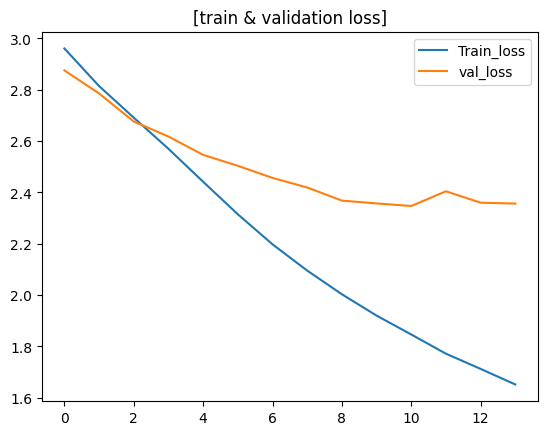

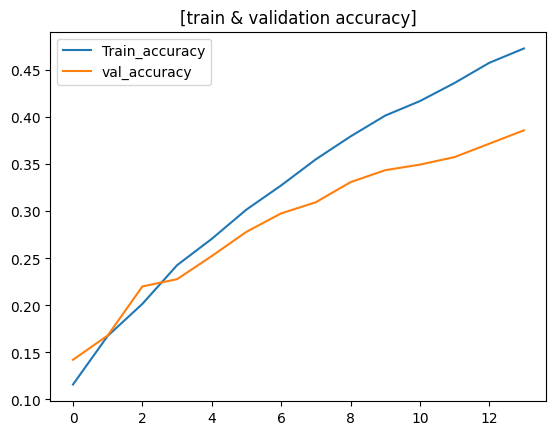

In [41]:
plt.plot(result.history['loss'],label='Train_loss')
plt.plot(result.history['val_loss'],label='val_loss')
plt.title('[train & validation loss]')
plt.legend()
plt.show()

plt.plot(result.history['accuracy'],label='Train_accuracy')
plt.plot(result.history['val_accuracy'],label='val_accuracy')
plt.title('[train & validation accuracy]')
plt.legend()
plt.show()

In [81]:
encoded_style = {
    '운동복 스타일': 0, 
    '바디컨scious 스타일': 1,
    '도시 글램 스타일': 2, 
    '클래식 스타일': 3,
    '디스코 스타일': 4, 
    '생태학적 스타일': 5, 
    '여성적 스타일': 6, 
    '성별 무관한 스타일': 7, 
    '그런지 스타일': 8, 
    '힙합 스타일': 9, 
    '히피 스타일': 10, 
    '키치 스타일': 11, 
    '란제리 스타일': 12, 
    '라운지 스타일': 13,
    '밀리터리 스타일': 14, 
    '최소주의 스타일': 15, 
    '노름코어 스타일': 16, 
    '동양적 스타일': 17, 
    '팝아트 스타일': 18, 
    '파워 수트 스타일': 19, 
    '펑크 스타일': 20, 
    '우주 스타일': 21, 
    '스포티브 캐주얼 스타일': 22
}


# 임의의 숫자를 입력해봅니다.
input_number = int(input(" 당신의 encoded_style는 몇번입니까 ? : "))

# 딕셔너리에서 해당 숫자에 대응하는 스타일을 가져옵니다.
style = [key for key, value in encoded_style.items() if value == input_number]

if style:
    print(f'입력한 숫자 {input_number}에 대응하는 스타일은 {style[0]}입니다.')
else:
    print(f'입력한 숫자 {input_number}에 대응하는 스타일이 존재하지 않습니다.')

입력한 숫자 5에 대응하는 스타일은 생태학적 스타일입니다.
